In [36]:
import pandas as pd
 
import string

import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../Data/Final_Thawra.csv',  header=1, index_col='recordnumber')
df.head(2)

,Initials,datecoded,narrative,nameofevent,Startdate,endate,ongoing,timeofprotest,time_range,governorate,...,articledate4,pagenum4,URL4,DB4,articledate1_restored,sourcename1_restored,articletitle1_restored,pagenum1_restored,URL1_restored,Unnamed: 158
recordnumber,,,,,,,,,,,,,,,,,,,,,
20190001.0,HAM,2022-11-23,CGTL and Sabaa Party organize a nation wide st...,NaN,2019-01-04,NaN,0.0,NaN,Unspecified,National,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190002.0,HAM,2023-01-12,اهالي تمنين التحتا يقطعون الطريق على تقاطع الم...,NaN,2019-01-04,NaN,NaN,NaN,Unspecified,Beqaa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.drop_duplicates(inplace=True)
df.shape

(3976, 158)

<AxesSubplot:>

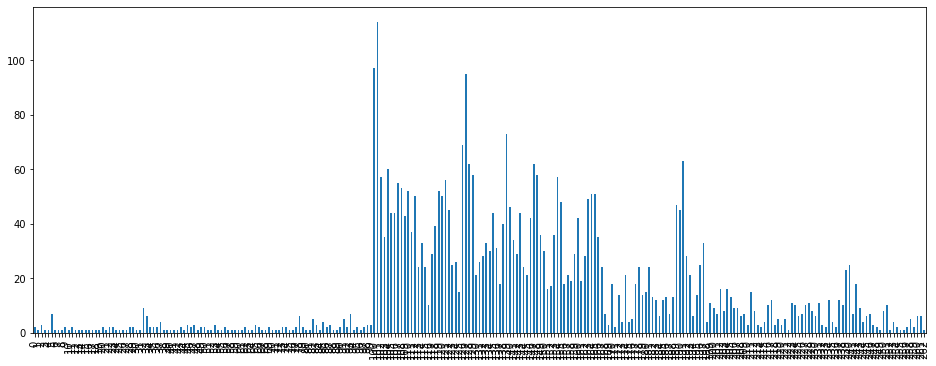

In [30]:
df.groupby('Startdate')['governorate'].count().plot(kind='bar', figsize=[16,6], use_index=False)

In [57]:
df1_grouped = df.groupby(['Startdate', 'governorate'])['narrative'].count().reset_index()
df1_grouped

,Startdate,governorate,narrative
0,2019-01-04,Beqaa,1
1,2019-01-04,National,1
2,2019-01-05,Mount Lebanon,1
3,2019-01-10,Beirut,1
4,2019-01-10,National,2
...,...,...,...
1019,2020-03-29,South,1
1020,2020-03-30,Akkar,2
1021,2020-03-30,Baalbeck-Hermel,1
1022,2020-03-30,North,3


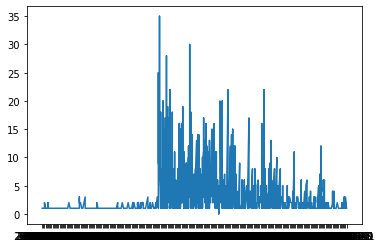

In [84]:
plt.plot(df1_grouped['Startdate'].to_numpy(), df1_grouped['narrative'].to_numpy())
plt.show()

In [39]:
pd.DataFrame(round(df.tacticprimary.value_counts()/len(df.tacticprimary)*100, 2))

,tacticprimary
Roadblock or blockade,44.87
Demonstration / protest,23.94
Occupation / sit-in,18.67
March,7.41
Other,1.39
Strike,1.08
Mass attack or mob,0.90
Festival / religious ceremony,0.45
Petition,0.18
Funeral march / funeral,0.15


  ### CSC Scrape

In [1]:
import requests

from bs4 import BeautifulSoup

In [17]:
url = 'https://civilsociety-centre.org/cap/collective_action'
response = requests.get(
    url='https://proxy.scrapeops.io/v1/',
    params={
        'api_key': '1821ebe5-bcab-43b0-803e-c896c19a91b5',
        'url': url,
    },
    )
# response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
iframe = soup.find('iframe')
iframe_responce = requests.get(iframe.attrs['src'])
iframe_soup = BeautifulSoup(response.text,'html.parser')

In [18]:
iframe_soup

<!DOCTYPE html>

<!--[if IEMobile 7]><html class="iem7" ><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7" ><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8" ><![endif]-->
<!--[if IE 8]><html class="lt-ie9" ><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html xmlns:fb="http://ogp.me/ns/fb#" xmlns:og="http://ogp.me/ns#"><!--<![endif]-->
<head>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-DBDJXWR2TS"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());
    gtag('config', 'G-DBDJXWR2TS');
  </script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- Growth powered by Shareaholic - https://www.shareaholic.com -->
<link as="script" href="//cdn.shareaholic.net/assets/pub/shareaholic.js" rel="preload"/>
<script data-cfasync="false">
  //<![CDATA[
    _SHR_SETTINGS = {"endpoints":{"share_counts_url":"https:\/\/civilso

In [ ]:
container = soup.find('div', {'class': 'l-content row archive-issues'})